In [1]:
import numpy as np
import matplotlib.pyplot as plt

class World(object):

    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.R = np.zeros(self.x*self.y)
        self.agentPos = 0
        self.grid = np.zeros((self.x, self.y))  # Adding the grid so we can visualize the environment later
        self.goalState = None  # Goal state will be set when calling setReward()
        self.fearState= None

    def xy2idx(self,x,y): # transfering the location to a unique id representing the current state
        return x*self.y + y

    def idx2xy(self,idx):
        # To do
        x = int(idx / self.y)
        y = idx % self.y
        # Based on idx that we have, how we can retrieve x, y?
        return x, y
        

    def resetAgent(self, pos):
        self.agentPos = int(pos)

    def setReward(self, x, y, r):
        # get the goal state location, and assigne a reward to that cell
        goalState = self.xy2idx(x, y)
        self.R[goalState] = r
        if r> 0:
            self.goalState = (x, y)  # Store goal state as a tuple (x, y)
        else:
            self.fearState= (x,y)

    def getState(self):
        return self.agentPos

    def getReward(self):
        return self.R[self.agentPos]

    def getNumOfStates(self):
        return self.x*self.y

    def getNumOfActions(self):
        return 4

    def move(self,id):
        x_, y_ = self.idx2xy(self.agentPos)
        tmpX = x_
        tmpY = y_
        
        # To do 
        # based on each possible action (id), change tmpX and tmpY

        if self.validMove(tmpX, tmpY):
            self.agentPos = self.xy2idx(tmpX,tmpY)

    def validMove(self,x,y):
        valid = True
        # To do
        valid = True
        # Add situations that Move will be invalid and Valid= False        
        return valid


    def display(self):
        fig, ax = plt.subplots()
    
        ax.set_facecolor('white')
        
        ax.imshow(self.grid, cmap="viridis", origin="upper", extent=(0, self.y, 0, self.x), alpha=0)
        agent_x, agent_y = self.idx2xy(self.agentPos)  
        agent_circle = plt.Circle((agent_y + 0.5, self.x - agent_x - 0.5), 0.3, color='grey', ec='black') 
        ax.add_patch(agent_circle) 
    

        if hasattr(self, 'goalState'):
            goal_x, goal_y = self.goalState 
            goal_circle = plt.Circle((goal_y + 0.5, self.x - goal_x - 0.5), 0.3, color='green', ec='black') 
            ax.add_patch(goal_circle)  
    
 
        if self.fearState != None:
            if hasattr(self, 'fearState'):
                fear_x, fear_y = self.fearState  
                fear_circle = plt.Circle((fear_y + 0.5, self.x - fear_x - 0.5), 0.3, color='red', ec='black')  
                ax.add_patch(fear_circle) 
        
        ax.set_xticks(np.arange(self.y))
        ax.set_yticks(np.arange(self.x))
        ax.set_xticklabels(np.arange(self.y))
        ax.set_yticklabels(np.arange(self.x)[::-1])
        ax.grid(which="both", color="black", linestyle="-", linewidth=1)
    
        plt.show()

NameError: name 'x' is not defined

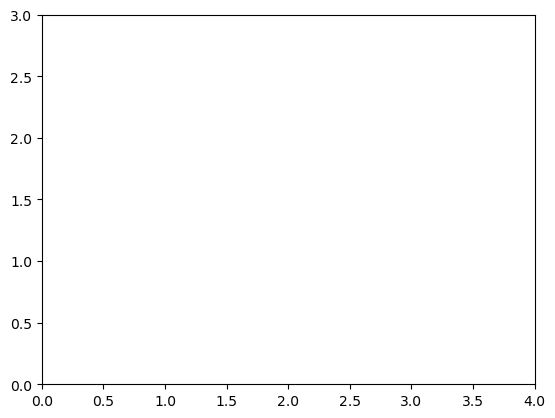

In [3]:
world = World(3,4)
world.setReward(2, 3, 1.0) #Goal state
world.setReward(1, 1, -1.0) #Fear region
world.display()


In [5]:
class Agent_SARSA(object):
    def __init__(self, world):
        self.world = world
        self.numOfActions = self.world.getNumOfActions()
        self.numOfStates = self.world.getNumOfStates()
        self.Q = np.random.uniform(0.0,0.01,(self.numOfStates,self.numOfActions))
        self.alpha = 0.7
        self.gamma = 0.4
        self.epsilon = 0.25

    # epsilon-greedy action selection
    def actionSelection(self, state):
         # To do
        
        # Add the algorithm that the agent choose an action based on epsilon-greedy action selection    
        return action

    def train(self, iter):
        for itr in range(iter):

            state = int(np.random.randint(0,self.numOfStates))
            self.world.resetAgent(state)

            # choose action
            a = self.actionSelection(state)
            expisode = True

            while expisode:
                # perform action
                self.world.move(a)
                # look for reward
                reward = self.world.getReward()
                state_new = int(self.world.getState())
                # new action
                a_new = self.actionSelection(state_new)

                # To do
                # calculate q value  and do the updating

                if reward == 1.0:
                    self.Q[state_new,:] = 0
                    expisode = False

        print(self.Q)
        return self.Q

    def plotQValues(self):
        plt.rcParams.update({'font.size': 18})
        plt.imshow(self.Q, cmap='Oranges', interpolation='nearest', aspect='auto')
        plt.colorbar()
        plt.title("Q-values")
        plt.xlabel("Actions")
        plt.ylabel("States")
        plt.xticks(np.arange(4), ('Down', 'Up', 'Right', 'Left'))
        plt.yticks(np.arange(self.numOfStates), np.arange(self.numOfStates))
        plt.show()


In [7]:
#Section 3.a.
world = World(3,4)

#Section 3.b.
world.setReward(2, 3, 1.0) #Goal state
world.setReward(1, 1, -1.0) #Fear region

#Section 3.c.
learner_SARSA = Agent_SARSA(world)

#Section 3.d.
learner_SARSA.train(1000)

#Section 3.e.
learner_SARSA.plotQValues()

NameError: name 'action' is not defined

In [ ]:
def show_path(agent, world):
    done = True
    steps = 0

    # Start with a random state
    state = int(np.random.randint(0, agent.numOfStates))
    world.resetAgent(state)

    while done:
        world.display() 
        
        #To do
        # Choose the action based on the Q-table
        print('Action taken:', )
        print('Q-table values for all actions in the state:',)
        world.move()

        # Get reward and new state
        reward = world.getReward()
        state = int(world.getState())
        steps += 1

        # Check if the episode is done
        if reward == 1.0:
            done = False

    world.display()  # Final visualization


In [ ]:
show_path(learner, world)

In [ ]:
class Agent_Q_learning(object):
    def __init__(self, world):
        self.world = world
        self.numOfActions = self.world.getNumOfActions()
        self.numOfStates = self.world.getNumOfStates()
        self.Q = np.random.uniform(0.0, 0.01, (self.numOfStates, self.numOfActions))
        self.alpha = 0.7
        self.gamma = 0.4
        self.epsilon = 0.25

    # epsilon-greedy action selection
    def actionSelection(self, state):
         # To do
        # Add the algorithm that the agent choose an action based on that    
        return action

    def train(self, iter):
        for itr in range(iter):
            state = int(np.random.randint(0, self.numOfStates))
            self.world.resetAgent(state)

            expisode = True

            while expisode:
                # choose action
                a = self.actionSelection(state)

                # perform action
                self.world.move(a)

                # look for reward
                reward = self.world.getReward()
                state_new = int(self.world.getState())
                
                #To do
                # update Q-values (using max Q-value for next state)


                if reward == 1.0:
                    self.Q[state_new,:] = 0
                    expisode = False

        print(self.Q)
        return self.Q

    def plotQValues(self):
        plt.rcParams.update({'font.size': 18})
        plt.imshow(self.Q, cmap='Oranges', interpolation='nearest', aspect='auto')
        plt.colorbar()
        plt.title("Q-values")
        plt.xlabel("Actions")
        plt.ylabel("States")
        plt.xticks(np.arange(4), ('Down', 'Up', 'Right', 'Left'))
        plt.yticks(np.arange(self.numOfStates), np.arange(self.numOfStates))
        plt.show()


In [ ]:

world = World(3,4)

#Section 3.b.
world.setReward(2, 3, 1.0) #Goal state
world.setReward(1, 1, -1.0) #Fear region

#Section 3.c.
learner_Q_learning = Agent_Q_learning(world)

#Section 3.d.
learner_Q_learning.train(1000)

#Section 3.e.
learner_Q_learning.plotQValues()

In [ ]:
show_path(learner_Q_learning , world)